# Data Preparation
[McGregor, S] Practical Python Data Wrangling and Data Quality. Kapitel 6: Assessing Data Quality

In [1]:
import pandas as pd
import numpy as np # linear algebra
import seaborn as sns # Plots
import matplotlib.pyplot as plt # Plots

# PPP Paycheck Protection Program
Kreditprogramm in den USA um Unternehmen während Covid-19 Pandemie zu unterstützen

Fragestellung: Konnten PPP Kredite kleine amerikanische Unternehmen retten?  

## Datensatz recent_ppp_data -> kompletter Datensatz
## Datensatz august_ppp_data -> Daten aus August 2020

Zunächst soll geklärt werden ob die Daten aus dem August im kompletten Datensatz enthalten sind, um sicherzustellen dass es sich nicht um ein Delta handelt

In [2]:
recent_ppp_data = pd.read_csv("/Users/schoch/Documents/0_Vorlesungen/DataScienceFundamentals/IntroductionToDataScience/2023_Git_WWI23B4/DataPreparation/chapter_6_data_files/public_150k_plus_recent.csv")
recent_ppp_data.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit
0,9547507704,05/01/2020,464,PPP,"SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150-9662,12/18/2020,...,NaN,NaN,Corporation,19248,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN
1,9777677704,05/01/2020,464,PPP,"PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420-9000,NaN,...,NaN,NaN,Sole Proprietorship,19248,Synovus Bank,COLUMBUS,GA,Male Owned,Non-Veteran,NaN
2,5791407702,05/01/2020,1013,PPP,BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,NaN,98112-2922,NaN,...,NaN,NaN,Non-Profit Organization,9551,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,Y
3,6223567700,05/01/2020,920,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407-1740,NaN,...,NaN,NaN,Corporation,9551,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,NaN
4,9662437702,05/01/2020,101,PPP,AERO BOX LLC,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,57328,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,NaN


In [3]:
august_ppp_data = pd.read_csv("/Users/schoch/Documents/0_Vorlesungen/DataScienceFundamentals/IntroductionToDataScience/2023_Git_WWI23B4/DataPreparation/chapter_6_data_files/public_150k_plus_080820.csv")
august_ppp_data.head()

,LoanRange,BusinessName,Address,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsReported,DateApproved,Lender,CD
0,"d $350,000-1 million",AERO BOX LLC,NaN,NaN,NaN,NaN,484210.0,NaN,Unanswered,Unanswered,Unanswered,NaN,NaN,05/03/2020,The Huntington National Bank,NaN
1,"d $350,000-1 million",BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,NaN,98112.0,NaN,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,75.0,05/03/2020,"Bank of America, National Association",WA-07
2,"d $350,000-1 million",KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407.0,236115.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,21.0,05/03/2020,"Bank of America, National Association",CA-31
3,"d $350,000-1 million","PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420.0,561730.0,Sole Proprietorship,Unanswered,Male Owned,Non-Veteran,NaN,73.0,05/03/2020,Synovus Bank,SC-01
4,"d $350,000-1 million","SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150.0,325510.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,62.0,05/03/2020,Synovus Bank,SC-05


In [4]:
recent_ppp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766499 entries, 0 to 766498
Data columns (total 50 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   LoanNumber                   766499 non-null  int64  
 1   DateApproved                 766499 non-null  object 
 2   SBAOfficeCode                766499 non-null  int64  
 3   ProcessingMethod             766499 non-null  object 
 4   BorrowerName                 766498 non-null  object 
 5   BorrowerAddress              766482 non-null  object 
 6   BorrowerCity                 766484 non-null  object 
 7   BorrowerState                766483 non-null  object 
 8   BorrowerZip                  766483 non-null  object 
 9   LoanStatusDate               217488 non-null  object 
 10  LoanStatus                   766499 non-null  object 
 11  Term                         766499 non-null  int64  
 12  SBAGuarantyPercentage        766499 non-null  int64  
 13 

In [5]:
recent_ppp_data.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit
0,9547507704,05/01/2020,464,PPP,"SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150-9662,12/18/2020,...,NaN,NaN,Corporation,19248,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN
1,9777677704,05/01/2020,464,PPP,"PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420-9000,NaN,...,NaN,NaN,Sole Proprietorship,19248,Synovus Bank,COLUMBUS,GA,Male Owned,Non-Veteran,NaN
2,5791407702,05/01/2020,1013,PPP,BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,NaN,98112-2922,NaN,...,NaN,NaN,Non-Profit Organization,9551,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,Y
3,6223567700,05/01/2020,920,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407-1740,NaN,...,NaN,NaN,Corporation,9551,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,NaN
4,9662437702,05/01/2020,101,PPP,AERO BOX LLC,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,57328,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,NaN


In [9]:
# Zeitraum der Daten
print(recent_ppp_data.DateApproved.min())
print(recent_ppp_data.DateApproved.max())
print(recent_ppp_data.DateApproved.dtype)
print(type(recent_ppp_data.DateApproved.min()))

2020-04-03 00:00:00
2021-01-31 00:00:00
datetime64[ns]
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


## Datum umwandeln
Die Spalte DateApproved ist nicht in einem Datumsformat --> umwandeln

In [10]:
# Umwandeln der Spalte DateApproved in ein Datumsformat mit Hilfe der Funktion pd.to_datetime (aus der Pandas Bibliothek)
# m = Monat (month)
# d = Tag (day)
# Y = Jahr (Year)
recent_ppp_data.DateApproved = pd.to_datetime(recent_ppp_data.DateApproved, format='%m/%d/%Y')
august_ppp_data.DateApproved = pd.to_datetime(august_ppp_data.DateApproved, format='%m/%d/%Y')

In [11]:
# Zeitraum der Daten
print(recent_ppp_data.DateApproved.min())
print(recent_ppp_data.DateApproved.max())
print(recent_ppp_data.DateApproved.dtype)

print(august_ppp_data.DateApproved.min())
print(august_ppp_data.DateApproved.max())
print(august_ppp_data.DateApproved.dtype)


2020-04-03 00:00:00
2021-01-31 00:00:00
datetime64[ns]
2020-04-03 00:00:00
2020-08-08 00:00:00
datetime64[ns]


In [12]:
# Vergleich der Spaltennamen
print(recent_ppp_data.columns)
print(august_ppp_data.columns)

Index(['LoanNumber', 'DateApproved', 'SBAOfficeCode', 'ProcessingMethod',
       'BorrowerName', 'BorrowerAddress', 'BorrowerCity', 'BorrowerState',
       'BorrowerZip', 'LoanStatusDate', 'LoanStatus', 'Term',
       'SBAGuarantyPercentage', 'InitialApprovalAmount',
       'CurrentApprovalAmount', 'UndisbursedAmount', 'FranchiseName',
       'ServicingLenderLocationID', 'ServicingLenderName',
       'ServicingLenderAddress', 'ServicingLenderCity', 'ServicingLenderState',
       'ServicingLenderZip', 'RuralUrbanIndicator', 'HubzoneIndicator',
       'LMIIndicator', 'BusinessAgeDescription', 'ProjectCity',
       'ProjectCountyName', 'ProjectState', 'ProjectZip', 'CD', 'JobsReported',
       'NAICSCode', 'RaceEthnicity', 'UTILITIES_PROCEED', 'PAYROLL_PROCEED',
       'MORTGAGE_INTEREST_PROCEED', 'RENT_PROCEED', 'REFINANCE_EIDL_PROCEED',
       'HEALTH_CARE_PROCEED', 'DEBT_INTEREST_PROCEED', 'BusinessType',
       'OriginatingLenderLocationID', 'OriginatingLender',
       'OriginatingLen

In [13]:
# Vergleich mit der Datei von August 2020 ob die Daten auch im recent_ppp_data Datensatz enthalten sind
august_ppp_data.sort_values(['DateApproved', 'BusinessName', 'Lender', 'Address']).head(20)

,LoanRange,BusinessName,Address,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsReported,DateApproved,Lender,CD
201195,"d $350,000-1 million","'EKAHI CARE MANAGEMENT, LLC",500 Ala Moana Blvd. Suite 6-D,HONOLULU,HI,96813.0,621111.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,24.0,2020-04-03,"American Savings Bank, FSB",HI-01
201196,"d $350,000-1 million",'EKAHI INTEGRATED PRACTICES CENTRAL LLC,321 N Kuakini St STE 201,HONOLULU,HI,96817.0,621112.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,57.0,2020-04-03,"American Savings Bank, FSB",HI-01
473545,"e $150,000-350,000","1 NATURAL WAY, LLC",4064 Technology Drive,MAUMEE,OH,43537.0,423450.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,26.0,2020-04-03,"Signature Bank, National Associatioin",OH-05
184264,"d $350,000-1 million",1380 VIRGINIA HOSPITALITY LLC,1380 VIRGINIA AVE,ATLANTA,GA,30344.0,721110.0,Limited Liability Company(LLC),White,Male Owned,Non-Veteran,NaN,99.0,2020-04-03,First International Bank & Trust,GA-05
436946,"e $150,000-350,000",13TH STEP LLC,130 Route 22,PAWLING,NY,12564.0,722511.0,Limited Liability Company(LLC),White,Male Owned,Non-Veteran,NaN,26.0,2020-04-03,Commercial Bank of California,NY-19
535836,"e $150,000-350,000",167 RAW KING ST LLC,193 KING ST,CHARLESTON,SC,29401.0,531120.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,50.0,2020-04-03,Aquesta Bank,SC-01
225763,"e $150,000-350,000",1721 W DIVISION CORP,1721 W. Division,CHICAGO,IL,60622.0,722511.0,Corporation,Unanswered,Male Owned,Unanswered,NaN,34.0,2020-04-03,Radius Bank,IL-04
358193,"e $150,000-350,000",1889 OF MISSOULA MONTANA LLC,125 N PATTEE ST,MISSOULA,MT,59802.0,722511.0,Limited Liability Company(LLC),White,Female Owned,Non-Veteran,NaN,23.0,2020-04-03,"First Montana Bank, Inc.",MT-00
379735,"e $150,000-350,000","1912 BENSON, LLC",6201 Maple Street,OMAHA,NE,68104.0,722511.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,24.0,2020-04-03,Access Bank,NE-02
255311,"e $150,000-350,000","1K9, INC.",2211 GRANDVIEW DR,GARDEN CITY,KS,67846.0,811192.0,Corporation,White,Male Owned,Non-Veteran,NaN,10.0,2020-04-03,The First National Bank of Syracuse,KS-01


In [14]:
# Im aktuellen Datensatz scheinen die Spalten unterschiedlich benannt 
# 'BorrowerName' = 'BusinessName' 
# 'OriginatingLender' = 'Lender'
# 'BorrowerAddress' = 'Address'

# Die ersten Spalten scheinen übereinzustimmen in den beiden Datensätzen

recent_ppp_data.sort_values(['DateApproved', 'BorrowerName', 'OriginatingLender', 'BorrowerAddress']).head(20)

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit
227568,4585707006,2020-04-03,951,PPP,"'EKAHI CARE MANAGEMENT, LLC",500 Ala Moana Blvd. Suite 6-D,HONOLULU,HI,96813-4984,01/21/2021,...,NaN,NaN,Limited Liability Company(LLC),112343,"American Savings Bank, FSB",HONOLULU,HI,Unanswered,Unanswered,NaN
227178,4566017005,2020-04-03,951,PPP,'EKAHI INTEGRATED PRACTICES CENTRAL LLC,321 N Kuakini St STE 201,HONOLULU,HI,96817-2306,NaN,...,NaN,NaN,Limited Liability Company(LLC),112343,"American Savings Bank, FSB",HONOLULU,HI,Unanswered,Unanswered,NaN
548618,4450017003,2020-04-03,549,PPP,"1 NATURAL WAY, LLC",4064 Technology Drive,MAUMEE,OH,43537-9263,NaN,...,NaN,NaN,Limited Liability Company(LLC),256729,"Signature Bank, National Association",TOLEDO,OH,Unanswered,Unanswered,NaN
209948,4519377005,2020-04-03,405,PPP,1380 VIRGINIA HOSPITALITY LLC,1380 VIRGINIA AVE,ATLANTA,GA,30344-5227,NaN,...,NaN,NaN,Limited Liability Company(LLC),52970,First International Bank & Trust,WATFORD CITY,ND,Unanswered,Unanswered,NaN
523224,4528267009,2020-04-03,202,PPP,13TH STEP LLC,130 Route 22,PAWLING,NY,12564-3210,NaN,...,NaN,NaN,Limited Liability Company(LLC),323687,Commercial Bank of California,IRVINE,CA,Male Owned,Non-Veteran,NaN
619549,4374707006,2020-04-03,464,PPP,167 RAW KING ST LLC,193 KING ST,CHARLESTON,SC,29401-3132,NaN,...,NaN,NaN,Limited Liability Company(LLC),443178,Aquesta Bank,CORNELIUS,NC,Male Owned,Non-Veteran,NaN
266182,4496897004,2020-04-03,507,PPP,1721 W DIVISION CORP,1721 W. Division,CHICAGO,IL,60622,NaN,...,NaN,NaN,Corporation,111901,Radius Bank,BOSTON,MA,Male Owned,Unanswered,NaN
414576,4483487000,2020-04-03,885,PPP,1889 OF MISSOULA MONTANA LLC,125 N PATTEE ST,MISSOULA,MT,59802-4400,12/16/2020,...,NaN,NaN,Limited Liability Company(LLC),41955,"First Montana Bank, Inc.",MISSOULA,MT,Female Owned,Non-Veteran,NaN
440658,4547467005,2020-04-03,766,PPP,"1912 BENSON, LLC",6201 Maple Street,OMAHA,NE,68104-4003,NaN,...,NaN,NaN,Limited Liability Company(LLC),452526,Access Bank,OMAHA,NE,Male Owned,Non-Veteran,NaN
294549,4528197001,2020-04-03,767,PPP,"1K9, INC.",2211 GRANDVIEW DR,GARDEN CITY,KS,67846-9668,NaN,...,NaN,NaN,Corporation,26475,The First National Bank of Syracuse,SYRACUSE,KS,Male Owned,Non-Veteran,NaN


# Join
Der Datensatz ppp_080820 enthält zusätzliche Information zum aktuellen Datensatz, es wäre sinnvoll diese zu kombinieren. Hierfür kann ein join genutzt werden

In [15]:
# outer join
merged_data = pd.merge(august_ppp_data,recent_ppp_data,how='outer',
left_on=['BusinessName','Lender','DateApproved'],right_on=['BorrowerName',
'ServicingLenderName','DateApproved'],indicator=True)

# durch den Parameter indicator=True: neue Spalte in merged_data wird erstellt,
#die angibt ob die Daten in einer oder beiden Tabellen auftritt

# `print()` the values in the "indicator" column, which has a default label of `_merge`
print(merged_data.value_counts('_merge'))

_merge
both          595866
right_only    171334
left_only      67333
Name: count, dtype: int64


In [16]:
merged_data.head()
# Es konnten 595866 Zeilen gejoined werden

,LoanRange,BusinessName,Address,City,State,Zip,NAICSCode_x,BusinessType_x,RaceEthnicity_x,Gender_x,...,DEBT_INTEREST_PROCEED,BusinessType_y,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender_y,Veteran_y,NonProfit_y,_merge
0,"d $350,000-1 million",AERO BOX LLC,NaN,NaN,NaN,NaN,484210.0,NaN,Unanswered,Unanswered,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,"d $350,000-1 million",BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,NaN,98112.0,NaN,Non-Profit Organization,Unanswered,Unanswered,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,"d $350,000-1 million",KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407.0,236115.0,Corporation,Unanswered,Unanswered,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,"d $350,000-1 million","PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420.0,561730.0,Sole Proprietorship,Unanswered,Male Owned,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,"d $350,000-1 million","SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150.0,325510.0,Corporation,Unanswered,Unanswered,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [35]:
print(recent_ppp_data.select_dtypes(include=['object']).apply(lambda col: col.unique()))

ProcessingMethod                                                 [PPP, PPS]
BorrowerName              [SUMTER COATINGS, INC., PLEASANT PLACES, INC.,...
BorrowerAddress           [2410 Highway 15 South, 7684 Southrail Road, 1...
BorrowerCity              [Sumter, North Charleston, SEATTLE, SAN BERNAR...
BorrowerState             [nan, AK, AL, AR, AS, AZ, CA, CO, CT, DC, DE, ...
BorrowerZip               [29150-9662, 29420-9000, 98112-2922, 92407-174...
LoanStatusDate            [12/18/2020, nan, 05/03/2020, 10/21/2020, 04/2...
LoanStatus                 [Paid in Full, Exemption 4, Active Un-Disbursed]
FranchiseName             [nan, McDonalds, General Motors, LLC (Chevrole...
ServicingLenderName       [Synovus Bank, Bank of America, National Assoc...
ServicingLenderAddress    [1148 Broadway, 100 N Tryon St, Ste 170, 17 S ...
ServicingLenderCity       [COLUMBUS, CHARLOTTE, ANCHORAGE, HILLSBORO, MC...
ServicingLenderState      [GA, NC, OH, AK, ID, AL, CA, CO, IL, SD, OR, I...
ServicingLen

# Iris Dateset

In [37]:
from sklearn import datasets

# Datensatz aus Bibliothek laden (Standarddatensatz)

iris = datasets.load_iris()
type(iris)

X = iris.data # Input Variablen
y = iris.target # Output Variable
df_iris = pd.DataFrame(X, columns = iris.feature_names) # Dataframe konstruieren
df_iris['target'] = iris.target

df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Duplicates
Der Datensatz enthält keine Dupikate
Diese könnten jedoch gelöscht werden mit df.drop_duplicates()

In [38]:
# Prüfen ob Duplikate enthalten sind
print(sum(df_iris.duplicated()))
df_iris= df_iris.drop_duplicates()
print(sum(df_iris.duplicated()))

1
0


In [39]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631,0.993289
std,0.830851,0.436342,1.767791,0.762622,0.817847
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.300000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [40]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  149 non-null    float64
 1   sepal width (cm)   149 non-null    float64
 2   petal length (cm)  149 non-null    float64
 3   petal width (cm)   149 non-null    float64
 4   target             149 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 7.0 KB


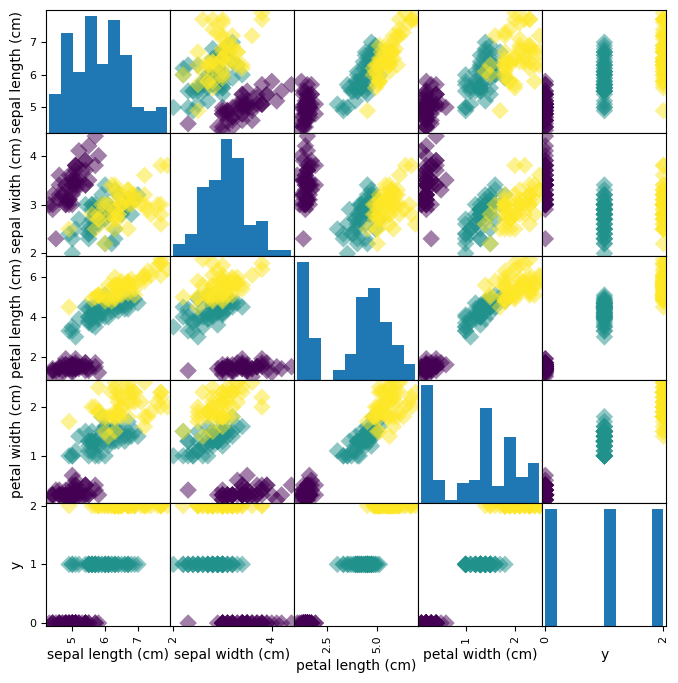

In [36]:
# Scatter Matrix Plotten mit der Outputvariablen als Farbkodierung

pd.plotting.scatter_matrix(df, c=y, figsize = [8,8],s=80, marker = 'D');
df['y'] = y

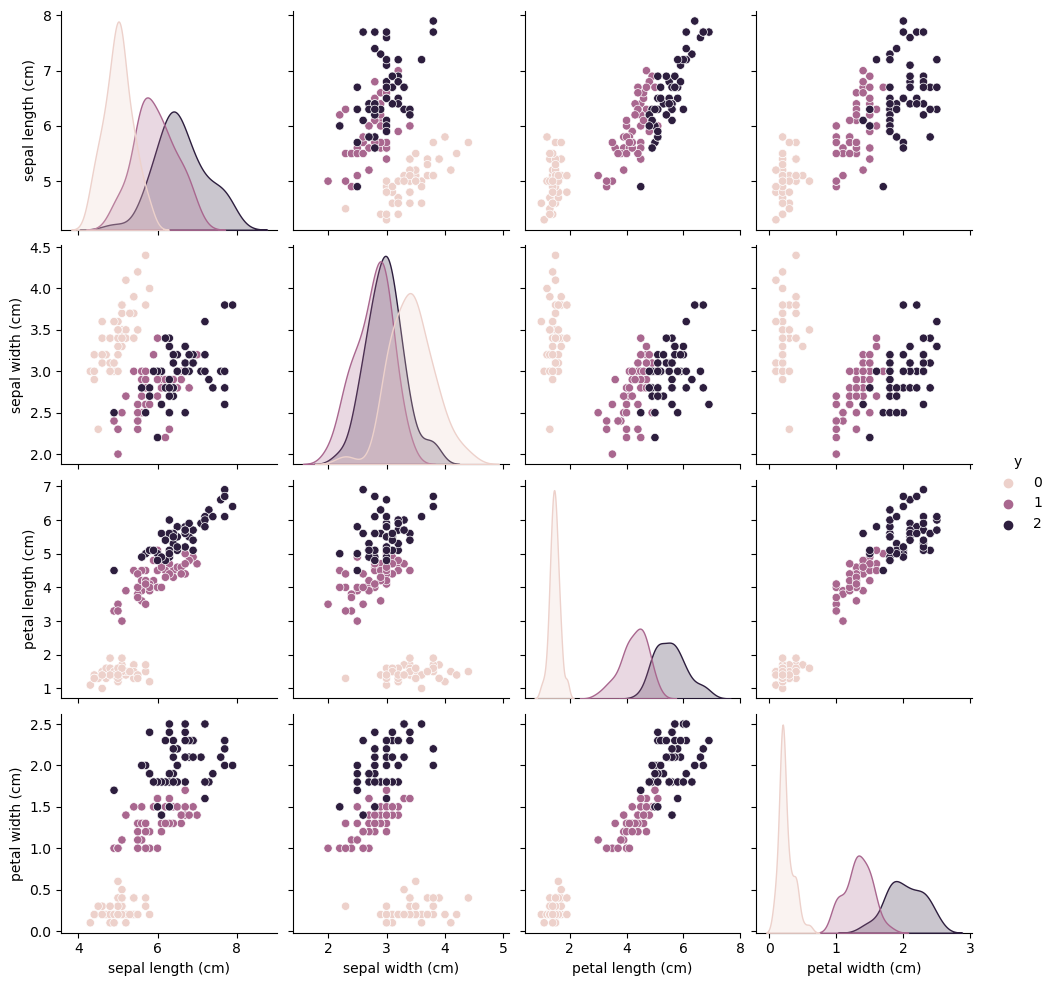

In [37]:
# Scatter Matrix Plotten mit der Outputvariablen als Farbkodierung
# Seaborn Bibliothek

sns.pairplot(df,hue='y')

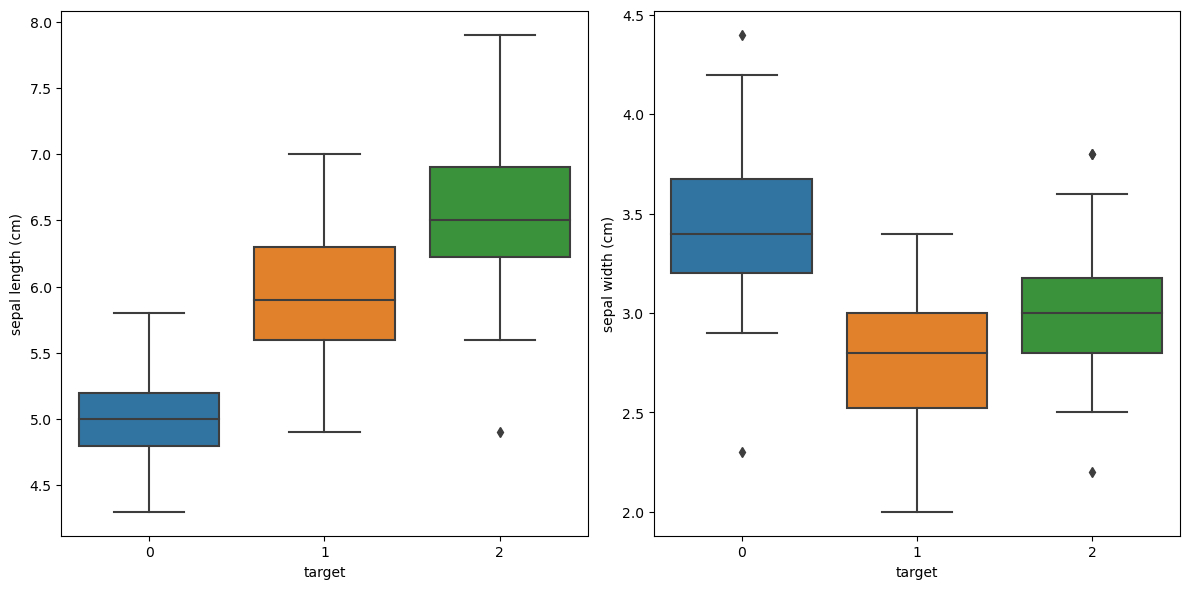

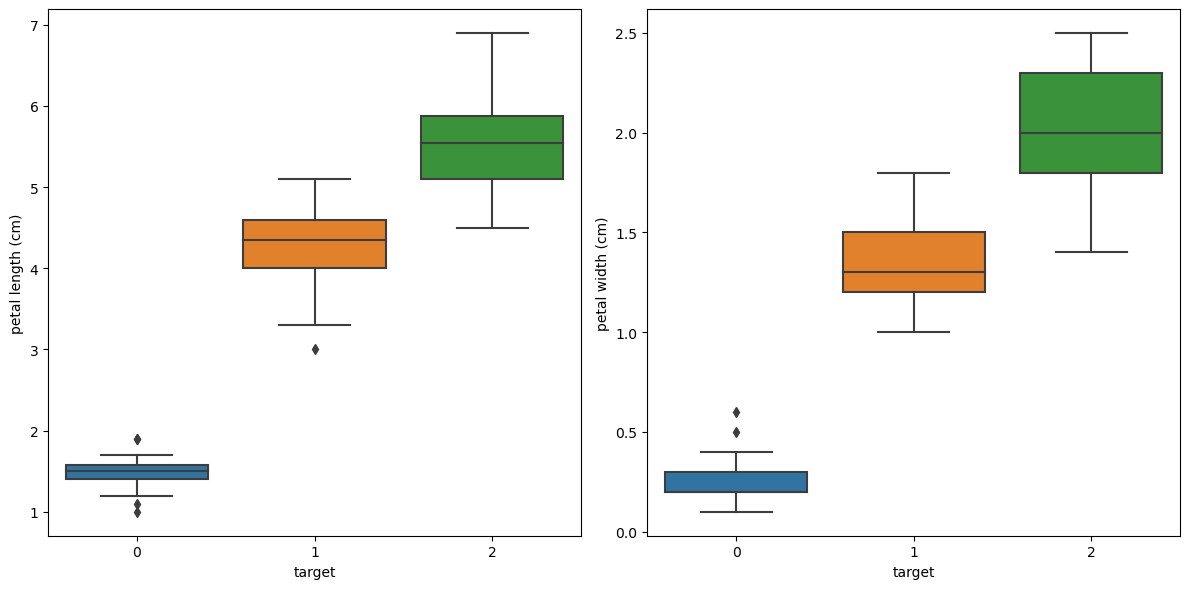

In [46]:
# Boxplots to visualize distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="target", y="sepal length (cm)", data=df_iris)
plt.subplot(1, 2, 2)
sns.boxplot(x="target", y="sepal width (cm)", data=df_iris)
plt.tight_layout()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="target", y="petal length (cm)", data=df_iris)
plt.subplot(1, 2, 2)
sns.boxplot(x="target", y="petal width (cm)", data=df_iris)
plt.tight_layout()

In [41]:
# Skalierung der Daten
# Viele Machine Learning Modelle setzten voraus dass die Input- und Output Variablen skaliert sind 
from sklearn.preprocessing import MinMaxScaler